ans = THE CLEAREST NEURAL NETWORK FRAMEWORK BY UNDWAD
classes = [0 1 2 3 4 5 6 7 8 9]
oh = 1
X = matrix [28 28 1 70000]
Y = matrix [1 70000]
oh_ = 1
X_ = matrix [28 28 1 11110]
Y_ = matrix [1 11110]
Yoh_ = matrix [10 11110]
unique(Y_) = [0 1 2 3 4 5 6 7 8 9]
X1 = matrix [28 28 1 9999]
Y1 = matrix [1 9999]
Y1oh = matrix [10 9999]
X2 = matrix [28 28 1 1111]
Y2 = matrix [1 1111]
Y2oh = matrix [10 1111]
unique(Y1) = [0 1 2 3 4 5 6 7 8 9]
unique(Y2) = [0 1 2 3 4 5 6 7 8 9]
BBB = cell [1 313]
BBB{1}.X = matrix [28 28 1 32]
BBB{1}.Y = matrix [10 32]


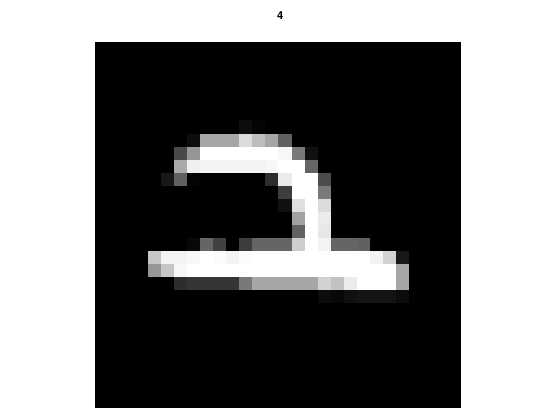

In [1]:
clear all;

global ipynb = 'mnist-conv2D';

source('clearest-nn.m');
source('utils-logging.m');
source('utils-training.m');

log2file(tmp('log'));

##########################################

mnist     = load('datasets/mnist-original.mat');
X         = mnist.data;
X         = reshape(X, 28, 28, 1, []);
Y         = mnist.label;
X         = double(X) / 255;
classes   = unique(Y); printvar('classes');
Yoh       = onehots(Y, classes);  
[X,Y,Yoh] = shuffle(X,Y,Yoh);
oh        = all(Y == onecolds(Yoh, classes, -1))
printsize('X');
printsize('Y');

idx = map(@(c) find(Y == c, 1111, 'first'), classes);
X_           =   X(:,:,:,idx);
Y_           =   Y(:,    idx);
Yoh_         = Yoh(:,    idx);
[X_,Y_,Yoh_] = shuffle(X_,Y_,Yoh_);
oh_          = all(Y_ == onecolds(Yoh_, classes, -1))

printsize('X_');
printsize('Y_');
printsize('Yoh_');
printvar('unique(Y_)');

m    = fix(count(X_) * 0.9);
X1   =   X_(:,:,:,   1:m);
Y1   =   Y_(:,       1:m);
Y1oh = Yoh_(:,       1:m);
X2   =   X_(:,:,:, m+1:end);
Y2   =   Y_(:,     m+1:end);
Y2oh = Yoh_(:,     m+1:end);

printsize('X1');
printsize('Y1');
printsize('Y1oh');
printsize('X2');
printsize('Y2');
printsize('Y2oh');
printvar('unique(Y1)');
printvar('unique(Y2)');

BBB = minibatches(X1, Y1oh, 32);
printsize('BBB');
printsize('BBB{1}.X');
printsize('BBB{1}.Y');

function SHOW(x, y)
    figure;
    imshow(x);
    title(disp(y));
end

function acc = TEST(CTX, X, Y, classes, alt)
    m   = count(X);
    Z   = predict(CTX, X);
    Z   = maxcolds(Z, classes, alt);
    acc = nnz(Z == Y) / m;
end

function TEST1(CTX, x, classes, alt)
    x(:,:,:,2) = x;
    z = predict(CTX, x);
    x = x(:,:,:,1);
    z = z(:,1);
    z = maxcolds(z, classes, alt);
    SHOW(x, z);
end

function CTX = LEARN(CTX, times=11, varargin)
    CTX           = TUNE(CTX, varargin{:});
    BBB           = evalin('caller', 'BBB');
    X2            = evalin('caller', 'X2');
    Y2            = evalin('caller', 'Y2');
    classes       = evalin('caller', 'classes');
    [CTX, ok]     = TRAIN(CTX, BBB, times); 
    test_accuracy = TEST(CTX, X2, Y2, classes, alt=-1);
    printvar('test_accuracy');
    global ipynb;
    notifed = pushnotify(sprintf('%s: smth_learnt=%s, test_accuracy=%f', ipynb, bool2yesno(ok), test_accuracy))
    if ok
        save('-binary', tmp('ctx'), 'CTX');
    end
end

[x,y] = pick(X1, Y1);
SHOW(x,y);


In [2]:
source('clearest-nn.m');
rand('state', 1);

num_c = count(classes);
printvar('num_c');

CTX = model( [28,28,1]
           , {'conv2D', [15,15, 5], 4}, 'relu', {'pool2D', [8,8], 3, 'max'}
           , 'reshape'
           , {'dense', num_c}
           , 'softmax'
           );
           
CTX = optimization( CTX
                  , {'L2_regularization', 0.0001}
                  , {'momentum', 0.0001}
%                   , {'nesterov', 0.01}
                  , {'gradient_clipping',0.9}
                  , 'stats'
                  );

CTX = objective(CTX, 'logloss');

load('-binary', tmp('ctx'), 'CTX');

% printmodel('CTX');
printunit(CTX.optimizers, 'stats', 'iter');


ans = THE CLEAREST NEURAL NETWORK FRAMEWORK BY UNDWAD
num_c = 10
stats.iter = 302984


In [ ]:
CTX = LEARN(CTX, times=11, {'momentum', 'rate', 0.005});

momentum.rate = 0.005000

starts_at = 10-May-2020 06:01:07
GRAD_DIFF = 0.000000
params_checked = 10

In [ ]:
CTX = LEARN(CTX, times=11, {'momentum', 'rate', 0.005});

In [ ]:
CTX = LEARN(CTX, times=11, {'momentum', 'rate', 0.005});

In [ ]:
CTX = LEARN(CTX, times=11, {'momentum', 'rate', 0.005});

In [ ]:
CTX = LEARN(CTX, times=11, {'momentum', 'rate', 0.005});

In [ ]:
CTX = LEARN(CTX, times=11, {'momentum', 'rate', 0.005});

In [ ]:
CTX = LEARN(CTX, times=11, {'momentum', 'rate', 0.005});

In [ ]:
CTX = LEARN(CTX, times=11, {'momentum', 'rate', 0.005});

In [ ]:
CTX = LEARN(CTX, times=11, {'momentum', 'rate', 0.005});

In [ ]:
CTX = LEARN(CTX, times=11, {'momentum', 'rate', 0.005});

In [ ]:
CTX = LEARN(CTX, times=11, {'momentum', 'rate', 0.005});

In [ ]:
CTX = LEARN(CTX, times=11, {'momentum', 'rate', 0.005});

In [ ]:
CTX = LEARN(CTX, times=11, {'momentum', 'rate', 0.005});

In [ ]:
CTX = LEARN(CTX, times=11, {'momentum', 'rate', 0.005});

In [ ]:
CTX = LEARN(CTX, times=11, {'momentum', 'rate', 0.005});

In [ ]:
CTX = LEARN(CTX, times=11, {'momentum', 'rate', 0.001});

In [ ]:
CTX = LEARN(CTX, times=11, {'momentum', 'rate', 0.001});

In [ ]:
CTX = LEARN(CTX, times=11, {'momentum', 'rate', 0.001});

In [ ]:
CTX = LEARN(CTX, times=11, {'momentum', 'rate', 0.001});

In [ ]:
CTX = LEARN(CTX, times=11, {'momentum', 'rate', 0.001});

In [ ]:
CTX = LEARN(CTX, times=11, {'momentum', 'rate', 0.001});

In [ ]:
CTX = LEARN(CTX, times=11, {'momentum', 'rate', 0.001});

In [ ]:
CTX = LEARN(CTX, times=11, {'momentum', 'rate', 0.001});

In [ ]:
CTX = LEARN(CTX, times=11, {'momentum', 'rate', 0.001});

In [ ]:
CTX = LEARN(CTX, times=11, {'momentum', 'rate', 0.001});

In [ ]:
CTX = LEARN(CTX, times=11, {'momentum', 'rate', 0.001});

In [ ]:
CTX = LEARN(CTX, times=11, {'momentum', 'rate', 0.001});

In [ ]:
CTX = LEARN(CTX, times=11, {'momentum', 'rate', 0.001});

In [ ]:
CTX = LEARN(CTX, times=11, {'momentum', 'rate', 0.001});

In [ ]:
CTX = LEARN(CTX, times=11, {'momentum', 'rate', 0.001});

In [ ]:
CTX = LEARN(CTX, times=11, {'momentum', 'rate', 0.001});

In [ ]:
CTX = LEARN(CTX, times=11, {'momentum', 'rate', 0.001});

In [ ]:
CTX = LEARN(CTX, times=11, {'momentum', 'rate', 0.001});

In [ ]:
CTX = LEARN(CTX, times=11, {'momentum', 'rate', 0.001});

In [ ]:
CTX = LEARN(CTX, times=11, {'momentum', 'rate', 0.001});

In [ ]:
train_accuracy = TEST(CTX, X1, Y1, classes, alt=-1)
test_accuracy = TEST(CTX, X2, Y2, classes, alt=-1)

In [ ]:
TEST1(CTX, pick(X2), classes, alt=-1);

In [ ]:
% CTX = model(12288, {'dense', 25}, 'relu', {'dense', 12}, 'relu', {'dense', num_c}, 'softmax');

% NOW = 19-Apr-2020 15:34:09
% train_accuracy =  0.251388888888889

% 1000 0.067233

% train_accuracy =  0.956944444444444
% NOW = 19-Apr-2020 16:13:38
% test_accuracy =  0.862500000000000